In [1]:
#essentials
import csv
import pandas as pd
import numpy as np
import string
import sklearn

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#from sknn.mlp import Classifier, Layer



#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
import prettyplotlib as ppl
import brewer2mpl
from prettyplotlib import mpl
from pandas.tools.plotting import scatter_matrix, lag_plot

%matplotlib inline  

#preprocessing
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, normalize,FunctionTransformer, scale,StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn import metrics
from patsy import dmatrices
from sklearn.feature_selection import RFE, RFECV


# ACCESS FILES

In [89]:
data = pd.read_csv('testsentimentclass.csv',sep =',')

In [90]:
data.head(5)

,file,below,awarda,achievement,approve,reduction,increased,growth,exceeded,increasing,...,increasingby,equityincentivesgranted,abovethetotalshareholderreturn,netincomegrowth,profitableyear,increasedbasesalaries,continuedachievement,continuedimprovement,performanceabovethesuperiorlevel,actual
0,24,0,0,0,3,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,37,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,317,5,0,45,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,323,8,0,0,6,0,28,33,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,335,8,0,21,4,0,0,6,4,0,...,0,0,0,0,0,0,0,0,0,-1


In [91]:
len(data)

190

# DATA PREPROCESSING

In [92]:
#fix arrangement of columns
#scale and normalize if needed (but since this is cash, no need)
#encode categorical features.. if needed
#list all column names
cols = list(data.columns.values) #usable
cols

['file',
 'below',
 'awarda',
 'achievement',
 'approve',
 'reduction',
 'increased',
 'growth',
 'exceeded',
 'increasing',
 'increase',
 'inexcessof',
 'strong',
 'decrease',
 'belowtarget',
 'loss',
 'successful',
 'increaseof',
 'increasein',
 'outstandingperformance',
 'anincrease',
 'nobonus',
 'accelerate',
 'successfulcompletion',
 'strongperformance',
 'increasedby',
 'outperforming',
 'salesgrowth',
 'revenuegrowth',
 'decidednottoincrease',
 'improved',
 'successfullymanaged',
 'noincrease',
 'progress',
 'outperformed',
 'expensereduction',
 'topquartile',
 'higherthan',
 'generated',
 'notmet',
 'atahighlevel',
 'grantedrestrictedstock',
 'increasedfrom',
 'receivedabasesalaryincrease',
 'didnotachieve',
 'bottom',
 'increaseinrevenues',
 'revenueincreased',
 'upfrom',
 'revenueincrease',
 'netincomeincreased',
 'milestones',
 'receivedasalaryincrease',
 'achievedtarget',
 'significantprogress',
 'anincreaseof',
 'grewby',
 'stronggrowth',
 'achievedrecordannualnetrevenues

In [7]:
# #dropping unncessary columns
# #convert col[type] to numeric
# data = pd.get_dummies(data, prefix = 'type', columns = ['type'])
# #arrange columns
# data = data[['isFraud','type_CASH_IN','type_CASH_OUT','type_TRANSFER','type_PAYMENT','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
# data.head(5)

# DATA EXPLORATION

In [94]:
#data exploration
data.groupby('actual').mean()
#on average, Fraud = 1 happen more on CASH_OUT and TRANSFER transactions

,file,below,awarda,achievement,approve,reduction,increased,growth,exceeded,increasing,...,slowdown,increasingby,equityincentivesgranted,abovethetotalshareholderreturn,netincomegrowth,profitableyear,increasedbasesalaries,continuedachievement,continuedimprovement,performanceabovethesuperiorlevel
actual,,,,,,,,,,,,,,,,,,,,,
-1,747.000000,7.857143,0.523810,15.714286,8.095238,0.476190,9.904762,12.714286,0.523810,0.190476,...,0.095238,0.095238,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
0,903.880952,7.095238,1.166667,13.785714,5.452381,0.547619,5.428571,8.785714,0.357143,0.380952,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,792.070866,9.551181,1.173228,22.393701,7.889764,0.653543,13.196850,18.897638,0.677165,0.385827,...,0.000000,0.000000,0.0,0.015748,0.015748,0.0,0.031496,0.015748,0.015748,0.062992


In [95]:
data.corr(method = 'pearson')

,file,below,awarda,achievement,approve,reduction,increased,growth,exceeded,increasing,...,increasingby,equityincentivesgranted,abovethetotalshareholderreturn,netincomegrowth,profitableyear,increasedbasesalaries,continuedachievement,continuedimprovement,performanceabovethesuperiorlevel,actual
file,1.000000,0.232203,0.174011,0.088736,0.214715,0.081024,0.134445,0.034663,-0.027373,-0.019382,...,-0.015691,NaN,-0.116854,-0.006480,NaN,0.012895,0.014483,0.014642,0.022423,-0.019245
below,0.232203,1.000000,0.386649,0.297629,0.432599,0.348686,0.461562,0.242704,0.105039,0.103021,...,-0.095316,NaN,0.034350,0.001934,NaN,-0.008872,-0.008872,0.034350,0.045156,0.129151
awarda,0.174011,0.386649,1.000000,0.194223,0.232957,0.269266,0.152430,0.122657,0.129067,0.169278,...,0.033328,NaN,-0.040734,0.033328,NaN,-0.040734,-0.040734,0.033328,-0.040734,0.083844
achievement,0.088736,0.297629,0.194223,1.000000,0.339350,0.348720,0.163941,0.335144,0.096446,0.046054,...,-0.044277,NaN,-0.034618,0.061968,NaN,0.090943,0.486946,0.158553,0.023333,0.143141
approve,0.214715,0.432599,0.232957,0.339350,1.000000,0.261688,0.272480,0.198991,0.138512,-0.005555,...,-0.017344,NaN,0.045784,0.033159,NaN,-0.093097,0.007908,0.007908,-0.017344,0.067311
reduction,0.081024,0.348686,0.269266,0.348720,0.261688,1.000000,0.233169,0.291326,0.009223,0.056141,...,-0.032481,NaN,-0.032481,0.233526,NaN,-0.032481,0.233526,0.180324,-0.032481,0.046630
increased,0.134445,0.461562,0.152430,0.163941,0.272480,0.233169,1.000000,0.338668,0.162613,0.057730,...,-0.016771,NaN,0.026289,0.176999,NaN,-0.016771,-0.016771,-0.059831,-0.016771,0.164993
growth,0.034663,0.242704,0.122657,0.335144,0.198991,0.291326,0.338668,1.000000,0.252304,0.195711,...,-0.032984,NaN,-0.023068,0.581813,NaN,-0.052816,0.145506,0.135589,0.086009,0.153605
exceeded,-0.027373,0.105039,0.129067,0.096446,0.138512,0.009223,0.162613,0.252304,1.000000,0.074410,...,-0.028371,NaN,0.067888,0.260406,NaN,-0.028371,0.067888,-0.028371,0.067888,0.063733
increasing,-0.019382,0.103021,0.169278,0.046054,-0.005555,0.056141,0.057730,0.195711,0.074410,1.000000,...,0.125159,NaN,-0.027768,0.201622,NaN,-0.027768,0.125159,-0.027768,-0.027768,0.052628


In [117]:
data_y = data[['actual']]

In [118]:
data_x = data.iloc[:,1:113]
data_x_log = (data_x+1).apply(np.log)
#data_x_scale = normalize(data_x)

KeyboardInterrupt: 

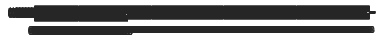

In [97]:
axes = pd.tools.plotting.scatter_matrix(pd.DataFrame(data_x_log))
plt.tight_layout()
plt.savefig('scatter_matrix.png')

In [14]:
#(data_x_nums < 0).any() #check if there are negatives or zeroes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff15cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a276f10>]], dtype=object)

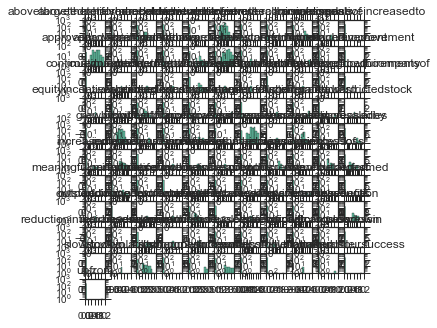

In [98]:
data_x_log.hist(figsize = (5,5),bins = 10, grid = False, log = True) #usable
#pd.DataFrame(data_x_scale).hist(figsize = (5,5),bins = 10, grid = False) #too skewed

# SPLIT TO X&Y

In [142]:
final_data = pd.concat([data_y,data_x], axis = 1)

In [120]:
cols = list(final_data.columns.values) #usable
cols

['actual',
 'below',
 'awarda',
 'achievement',
 'approve',
 'reduction',
 'increased',
 'growth',
 'exceeded',
 'increasing',
 'increase',
 'inexcessof',
 'strong',
 'decrease',
 'belowtarget',
 'loss',
 'successful',
 'increaseof',
 'increasein',
 'outstandingperformance',
 'anincrease',
 'nobonus',
 'accelerate',
 'successfulcompletion',
 'strongperformance',
 'increasedby',
 'outperforming',
 'salesgrowth',
 'revenuegrowth',
 'decidednottoincrease',
 'improved',
 'successfullymanaged',
 'noincrease',
 'progress',
 'outperformed',
 'expensereduction',
 'topquartile',
 'higherthan',
 'generated',
 'notmet',
 'atahighlevel',
 'grantedrestrictedstock',
 'increasedfrom',
 'receivedabasesalaryincrease',
 'didnotachieve',
 'bottom',
 'increaseinrevenues',
 'revenueincreased',
 'upfrom',
 'revenueincrease',
 'netincomeincreased',
 'milestones',
 'receivedasalaryincrease',
 'achievedtarget',
 'significantprogress',
 'anincreaseof',
 'grewby',
 'stronggrowth',
 'achievedrecordannualnetrevenu

In [110]:
stri = ''
for i in cols:
    stri = stri +str(i) + '+'

In [104]:
stri

'file+below+awarda+achievement+approve+reduction+increased+growth+exceeded+increasing+increase+inexcessof+strong+decrease+belowtarget+loss+successful+increaseof+increasein+outstandingperformance+anincrease+nobonus+accelerate+successfulcompletion+strongperformance+increasedby+outperforming+salesgrowth+revenuegrowth+decidednottoincrease+improved+successfullymanaged+noincrease+progress+outperformed+expensereduction+topquartile+higherthan+generated+notmet+atahighlevel+grantedrestrictedstock+increasedfrom+receivedabasesalaryincrease+didnotachieve+bottom+increaseinrevenues+revenueincreased+upfrom+revenueincrease+netincomeincreased+milestones+receivedasalaryincrease+achievedtarget+significantprogress+anincreaseof+grewby+stronggrowth+achievedrecordannualnetrevenues+achievementofouroverallbusinessgoals+towardsoursuccess+fellshort+grantaward+approvedadiscretionarybonus+oneofthelargest+incentivecashbonuses+receiveseverancebenefits+exceedingourtarget+exceptionalperformance+demonstratedability+cont

In [143]:
#S1.1
y_log,x_log = dmatrices('actual~below+awarda+achievement+approve+reduction+increased+growth+exceeded+increasing+increase+inexcessof+strong+decrease+belowtarget+loss+successful+increaseof+increasein+outstandingperformance+anincrease+nobonus+accelerate+successfulcompletion+strongperformance+increasedby+outperforming+salesgrowth+revenuegrowth+decidednottoincrease+improved+successfullymanaged+noincrease+progress+outperformed+expensereduction+topquartile+higherthan+generated+notmet+atahighlevel+grantedrestrictedstock+increasedfrom+receivedabasesalaryincrease+didnotachieve+bottom+increaseinrevenues+revenueincreased+upfrom+revenueincrease+netincomeincreased+milestones+receivedasalaryincrease+achievedtarget+significantprogress+anincreaseof+grewby+stronggrowth+achievedrecordannualnetrevenues+achievementofouroverallbusinessgoals+towardsoursuccess+fellshort+grantaward+approvedadiscretionarybonus+oneofthelargest+incentivecashbonuses+receiveseverancebenefits+exceedingourtarget+exceptionalperformance+demonstratedability+continuedtoimprove+increasesinthebasesalaries+rose+highestforanyfiscalyear+significantprogressin+continuetogrow+increaseingrossprofit+recordrevenue+continuedprogress+depositsincreased+remainedstrong+annualincentiveincreasedto+evolution+emerginggrowthcompany+didnotmeetthethresholdrequirementsof+millionofgrowth+attainmentofthismeasure+abovetargetedperformancelevels+reductionintheirbasesalaries+toaloss+netsalesgrowth+decreasefrom+raisedthebasesalary+increasesinbasesalary+bestperformance+meaningfulperformance+increasebasesalary+performedextremelywell+rewardindividualperformance+achievethecorporategoals+exceedingindustryaverage+stockvolatility+slowdownin+slowdown+increasingby+equityincentivesgranted+abovethetotalshareholderreturn+netincomegrowth+profitableyear+increasedbasesalaries+continuedachievement+continuedimprovement+performanceabovethesuperiorlevel',final_data,return_type = 'dataframe')


print x_log.columns
#flatten y into array
y_log = np.ravel(y_log)

Index([u'Intercept', u'below', u'awarda', u'achievement', u'approve',
       u'reduction', u'increased', u'growth', u'exceeded', u'increasing',
       ...
       u'slowdown', u'increasingby', u'equityincentivesgranted',
       u'abovethetotalshareholderreturn', u'netincomegrowth',
       u'profitableyear', u'increasedbasesalaries', u'continuedachievement',
       u'continuedimprovement', u'performanceabovethesuperiorlevel'],
      dtype='object', length=113)


In [124]:
y_log

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [144]:
#SPLIT
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size = 0.2, random_state = 0)

In [75]:
# svc = SVC(kernel = 'linear')
# rfecv = RFECV(estimator = svc, step = 1, cv = StratifiedKFold(3), scoring = 'accuracy')
# rfecv.fit(x_train, y_train)
# plt.figure()
# plt.plot(range(1, len(rfecv.grid_scores_) +1), rfecv.grid_scores_)
# plt.show

# LOG REGRESSION

In [76]:
#create logR model and fit with x and y
logr = LogisticRegression() 
logr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
predicted_logr = logr.predict(x_test)

In [78]:
prob_logr = logr.predict_proba(x_test)

In [79]:
print 'Logistic Regression'
print 'Accuracy: ' + str(metrics.accuracy_score(y_test,predicted_logr))
print 'ROC AUC Score: ' + str(metrics.roc_auc_score(y_test,prob_logr[:,1]))
print metrics.classification_report(y_test, predicted_logr)
pd.crosstab(y_test,predicted_logr, rownames = ['Actual'],colnames = ['Predicted'], margins = True)

Logistic Regression
Accuracy: 0.838709677419
ROC AUC Score: 0.587179487179
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        15
        1.0       0.84      1.00      0.91        78

avg / total       0.70      0.84      0.77        93



Predicted,1.0,All
Actual,,
0.0,15,15
1.0,78,78
All,93,93


# RANDOM FOREST

In [126]:
extra = ExtraTreesClassifier()
extra.fit(x_train, y_train)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [127]:
featurenames = x_train.columns
featureimportance = extra.feature_importances_
feature_importance_list = pd.DataFrame(featureimportance, index = featurenames, columns = ['importance'])

In [128]:
feature_importance_list.sort_values(by = ['importance'], ascending = False)

,importance
approve,0.087592
achievement,0.080485
strong,0.070003
increase,0.068069
below,0.062606
inexcessof,0.050372
increased,0.048924
growth,0.043662
loss,0.033271
accelerate,0.032568


In [129]:
predicted_etc = extra.predict(x_test)

In [130]:
prob_etc = extra.predict_proba(x_test)

In [131]:
print 'Random Forest'
print 'Accuracy: ' + str(metrics.accuracy_score(y_test,predicted_etc))
print 'ROC AUC Score: ' + str(metrics.roc_auc_score(y_test,prob_etc[:,1]))
print metrics.classification_report(y_test, predicted_etc)
pd.crosstab(y_test,predicted_etc, rownames = ['Actual'],colnames = ['Predicted'], margins = True)

Random Forest
Accuracy: 0.631578947368


ValueError: multiclass format is not supported

# NEURAL NETWORK

In [145]:
mlp = MLPClassifier(activation = 'logistic', solver= 'lbfgs', hidden_layer_sizes = 7, max_iter = 100, verbose = True, early_stopping = True)
#nnmpl = Classifier(layers = [Layer("Sigmoid", units = 100),Layer("Softmax")],learning_rate = 0.001, n_iter = 25)


In [146]:
mlp.fit(x_train,y_train)
predicted_mlp = mlp.predict(x_test)
prob_mlp = mlp.predict_proba(x_test)

#nnmpl.fit(x_train,y_train)
#predicted_nnmpl = nnmpl.predict(x_test)
#proba_nnmpl = nnmpl.predict_proba(x_test)

In [147]:
print 'Neural Network'
print 'Accuracy: ' + str(metrics.accuracy_score(y_test,predicted_mlp))
#print 'ROC AUC Score: ' +str(metrics.roc_auc_score(y_test,prob_mlp[:,1]))
print metrics.classification_report(y_test, predicted_mlp)
pd.crosstab(y_test,predicted_mlp, rownames = ['Actual'],colnames = ['Predicted'], margins = True)

Neural Network
Accuracy: 0.578947368421
             precision    recall  f1-score   support

       -1.0       0.33      0.25      0.29         4
        0.0       0.00      0.00      0.00         8
        1.0       0.68      0.81      0.74        26

avg / total       0.50      0.58      0.53        38



Predicted,-1.0,0.0,1.0,All
Actual,,,,
-1.0,1,1,2,4
0.0,0,0,8,8
1.0,2,3,21,26
All,3,4,31,38


In [150]:
new = pd.DataFrame(y_test, columns =[''])

In [151]:
new.head(5)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [152]:
new['Predicted'] = predicted_mlp

In [153]:
new.head(5)

,0,Predicted
0,1.0,0.0
1,1.0,1.0
2,1.0,-1.0
3,1.0,0.0
4,1.0,1.0


In [155]:
new.rename(columns={'0':'Actual'})

,0,Predicted
0,1.0,0.0
1,1.0,1.0
2,1.0,-1.0
3,1.0,0.0
4,1.0,1.0
5,1.0,1.0
6,-1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,-1.0,-1.0
